# **Linear Regression:**

Linear regression is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables. In linear regression, the relationship between the variables is modeled using a linear equation. This equation can be used to predict the value of the dependent variable based on the values of the independent variables.

There are several types of linear regression, including simple linear regression, multiple linear regression, and polynomial regression.

* **Simple linear regression:** This type of linear regression models the relationship between a dependent variable and a single independent variable. It is used to identify the strength of the relationship between the two variables and to predict the value of the dependent variable based on the value of the independent variable.

* **Multiple linear regression:** This type of linear regression models the relationship between a dependent variable and two or more independent variables. It is used to identify the strength of the relationship between the variables and to predict the value of the dependent variable based on the values of the independent variables.

* **Polynomial regression:** This type of linear regression is used to model relationships between the dependent and independent variables that are not linear. It can be used to fit a curve to the data and make predictions based on the curve.


*Multiple regression* is a statistical method used to model the relationship between multiple independent variables and a dependent variable. In Python, this can be performed using the sklearn library. To use multiple regression with this library, you will first need to create a LinearRegression object, then train the model on your data using the fit() method. Once the model is trained, you can use the predict() method to make predictions on new data.

* Here : Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + …… bn * xn
* Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables
b=weights or Parameteres

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Reading the Dataset
data1 = pd.read_csv("/content/data.csv")
data1.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [6]:
data1.shape

(36, 5)

In [9]:
# Look for correlation among the Variables is in the Dataset
data1.corr()

<ipython-input-9-5d05cc937d57>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


from matplotlib import pyplot as plt
_df_0['Volume'].plot(kind='hist', bins=20, title='Volume')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CO2'].plot(kind='hist', bins=20, title='CO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Volume', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Weight', y='CO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Volume'].plot(kind='line', figsize=(8, 4), title='Volume')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['CO2'].plot(kind='line', figsize=(8, 4), title='CO2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
# Showing statistical Properties of the Dataset
data1.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [12]:
# Data spliting
# Independent Varaiables(Weight,Volume)
X=data1[['Weight','Volume']]
# Dependent Variable or Target Variable
y = data1['CO2']

**Checking for outliers**

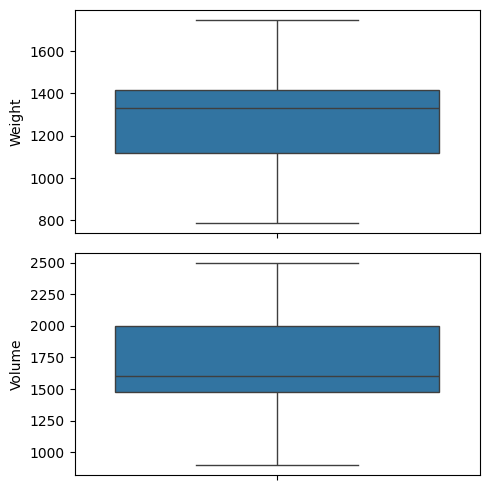

In [17]:
# BOXPLOT- provides a summary of the central tendency, dispersion,
# and skewness of the data. The boxplot is particularly useful for identifying the presence of outliers
# and comparing the distribution of different datasets.

# plt.boxplot(data1,labels=data1['Volume','Weight'])
# plt.xlabel['Columns']
# plt.ylabel['values']
# plt.title['Box plot of Volume and Weight']
# plt.show()
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(data1['Weight'], ax = axs[0])
plt2 = sns.boxplot(data1['Volume'], ax = axs[1])
plt.tight_layout()

# Exploratory Data Analysis

**Distribution of the target variable**

<ipython-input-18-0ff6890c65d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['CO2']);


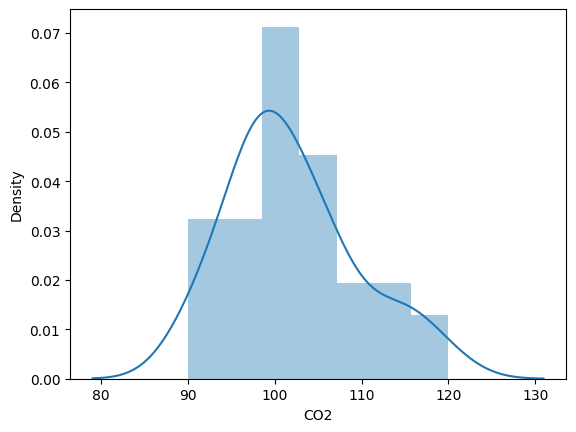

In [18]:
sns.distplot(data1['CO2']);


In a distribution plot, you typically see a smooth curve that represents the estimated probability density of the data. It can be particularly useful for visualizing the shape of the distribution and identifying patterns such as modes and skewness.

**Conclusion:** It is normally distributed

**Relationship of CO2 with other variables**

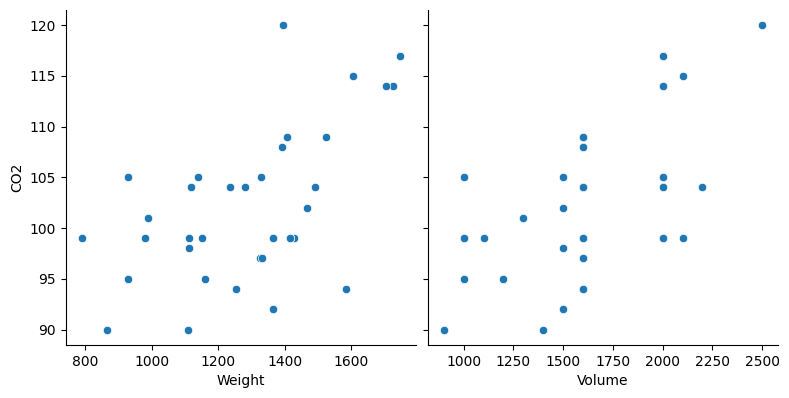

In [19]:
sns.pairplot(data1, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

**Heatmap**
The sns.heatmap() function creates a visualization that shows the correlation matrix of a dataset as a heatmap. The annot parameter of this function shows or does not show correlation values in the cells of the heatmap. If this parameter is set to True, correlation values in cells are displayed.

<ipython-input-21-1e64facde8dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), annot = True, cmap = 'coolwarm')


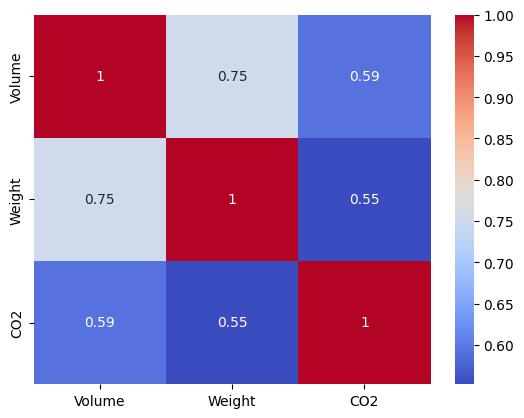

In [21]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(data1.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Model Building

**Splitting the dataset into train and test set**

We need to split our dataset into training and testing sets. We’ll perform this by importing train_test_split from sklearn.model_selection library. It is usually good to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [22]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [23]:
y_train.shape

(25,)

In [24]:
y_test.shape

(11,)

In [26]:
model = linear_model.LinearRegression()

In [27]:
#Fitting the Multiple Linear Regression model
model = LinearRegression().fit(X_train, y_train)

In [28]:
#Printing the model coefficients
print('Intercept: ',model.intercept_)
# pair the feature names with the coefficients
list(zip(X, model.coef_))

Intercept:  74.33882836589245


[('Weight', 0.0171800645996374), ('Volume', 0.0025046399866402976)]

In [29]:
#Predicting the Test and Train set result
y_pred=model.predict(X_test)
x_pred=model.predict(X_train)

In [30]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [31]:
#Actual value and the predicted value
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
model_diff

,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [32]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.901980901636316
Mean Square Error: 63.39765310998794
Root Mean Square Error: 7.96226432053018
